In [69]:
# 导入包

import pandas as pd
import hvplot.pandas
import panel as pn
import matplotlib.pyplot as plt

In [70]:
# 导入数据

df_v = pd.read_csv("vaccinations.csv")
df_v.tail(5)

,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
2545113,2022-08-21,ZW,365.0,6400632.0,416.0,4715815.0,2011.0,12105303.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2545114,2022-08-24,ZW,3621.0,6404253.0,3488.0,4719303.0,15923.0,12121226.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2545115,2022-08-25,ZW,3684.0,6407937.0,2897.0,4722200.0,12159.0,12133385.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2545116,2022-08-27,ZW,3069.0,6411006.0,2899.0,4725099.0,12206.0,12145591.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2545117,2022-09-08,ZW,5608.0,6416614.0,5404.0,4730503.0,16007.0,12161598.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# 里面location_key存在空值，去除空值

df_v.dropna(subset="location_key",inplace=True)

In [73]:
# 导入index的数据

df_loc = pd.read_csv("index.csv")
df_loc.head(5)

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
0,AD,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0
1,AE,ChIJvRKrsd9IXj4RpwoIwFYv0zM,Q878,country/ARE,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,AE,ARE,0
2,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,Q889,country/AFG,AF,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,AF,AFG,0
3,AF_BAL,ChIJWZOescNSyzgRkmVJ8fmfR3k,Q121104,NaN,AF,Afghanistan,BAL,Balkh,NaN,NaN,NaN,NaN,AF,AFG,1
4,AF_BAM,ChIJw-bKQwDr0jgRQiw8jHsQ-HI,Q171382,NaN,AF,Afghanistan,BAM,Bamyan,NaN,NaN,NaN,NaN,AF,AFG,1


In [82]:
# 制作index的一个字典，country_code：(list_country_name,list_iso)

list_country_code = df_loc["country_code"].unique()
list_country_name = df_loc["country_name"].unique()
list_iso = df_loc["iso_3166_1_alpha_3"].unique()
dict_country = dict(zip(list_country_code,zip(list_country_name,list_iso)))
dict_country

{'AD': ('Andorra', 'AND'),
 'AE': ('United Arab Emirates', 'ARE'),
 'AF': ('Afghanistan', 'AFG'),
 'AG': ('Antigua and Barbuda', 'ATG'),
 'AI': ('Anguilla', 'AIA'),
 'AL': ('Albania', 'ALB'),
 'AM': ('Armenia', 'ARM'),
 'AN': ('Netherlands Antilles', nan),
 'AO': ('Angola', 'AGO'),
 'AQ': ('Antarctica', 'ATA'),
 'AR': ('Argentina', 'ARG'),
 'AS': ('American Samoa', 'ASM'),
 'AT': ('Austria', 'AUT'),
 'AU': ('Australia', 'AUS'),
 'AW': ('Aruba', 'ABW'),
 'AZ': ('Azerbaijan', 'AZE'),
 'BA': ('Bosnia and Herzegovina', 'BIH'),
 'BB': ('Barbados', 'BRB'),
 'BD': ('Bangladesh', 'BGD'),
 'BE': ('Belgium', 'BEL'),
 'BF': ('Burkina Faso', 'BFA'),
 'BG': ('Bulgaria', 'BGR'),
 'BH': ('Bahrain', 'BHR'),
 'BI': ('Burundi', 'BDI'),
 'BJ': ('Benin', 'BEN'),
 'BM': ('Bermuda', 'BMU'),
 'BN': ('Brunei', 'BRN'),
 'BO': ('Bolivia', 'BOL'),
 'BQ': ('Caribbean Netherlands', 'BES'),
 'BR': ('Brazil', 'BRA'),
 'BS': ('Bahamas', 'BHS'),
 'BT': ('Bhutan', 'BTN'),
 'BV': ('Bouvet Island', 'BVT'),
 'BW': ('Botsw

In [75]:
# 通过index字典，将vaccinations的dataframe添加一列为对应country的名字

df_v["location_key_c"] = df_v.apply(lambda x : dict_country[x["location_key"].split("_")[0]][0], axis = 1)
df_v

,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,...,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac,location_key_c
0,2021-01-25,AD,NaN,576.0,NaN,NaN,NaN,576.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andorra
1,2021-02-01,AD,460.0,1036.0,NaN,NaN,460.0,1036.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andorra
2,2021-02-10,AD,255.0,1291.0,NaN,NaN,255.0,1291.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andorra
3,2021-02-12,AD,331.0,1622.0,NaN,NaN,331.0,1622.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andorra
4,2021-02-19,AD,519.0,2141.0,NaN,NaN,519.0,2141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andorra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545113,2022-08-21,ZW,365.0,6400632.0,416.0,4715815.0,2011.0,12105303.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe
2545114,2022-08-24,ZW,3621.0,6404253.0,3488.0,4719303.0,15923.0,12121226.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe
2545115,2022-08-25,ZW,3684.0,6407937.0,2897.0,4722200.0,12159.0,12133385.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe
2545116,2022-08-27,ZW,3069.0,6411006.0,2899.0,4725099.0,12206.0,12145591.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe


In [83]:
# 制作一个location_key的列表，包含vaccinations的dataframe所有的country的名字

location_key = []
df_group = df_v.groupby("location_key_c")
for key,value in df_group:
    location_key.append(key)
    
location_key

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Caribbean Netherlands',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Polynes

In [105]:
# bar图展示国家对于疫苗随着时间的新增接种情况，可以选择不同国家，疫苗的针数

Select = pn.widgets.Select(name = "Select", options = location_key)
y = pn.widgets.Select(name = "y", options = ["new_persons_vaccinated","new_persons_fully_vaccinated","new_vaccine_doses_administered"])

@pn.depends(Select,y)
def make_plot(Select,y):
    df_Select = df_v[df_v["location_key_c"] == Select]
    df_Select["year-month"] = df_Select.apply(lambda x : x["date"].split("-")[0]+"-"+x["date"].split("-")[1], axis = 1)
    df_sum = df_Select.groupby("year-month").sum()
    plot = df_sum.hvplot.bar(x = "year-month", y = y,rot = 90)
    return plot

pn.Column(pn.WidgetBox(Select,y),make_plot)

C:\Users\Simia\AppData\Local\Temp\ipykernel_62268\3888748258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Select["year-month"] = df_Select.apply(lambda x : x["date"].split("-")[0]+"-"+x["date"].split("-")[1], axis = 1)


Column
    [0] WidgetBox
        [0] Select(options=['Afghanistan', ...], value='Afghanistan')
        [1] Select(name='y', options=['new_persons_vaccinated',...], value='new_persons_vaccinated')
    [1] ParamFunction(function)

In [106]:
# bar图展示国家对于疫苗随着时间的累计接种情况，可以选择不同国家，疫苗的针数

Select = pn.widgets.Select(name = "Select", options = location_key)
y = pn.widgets.Select(name = "y", options = ["cumulative_persons_vaccinated","cumulative_persons_fully_vaccinated","cumulative_vaccine_doses_administered"])

@pn.depends(Select,y)
def make_plot(Select,y):
    df_Select = df_v[df_v["location_key_c"] == Select]
    df_Select["year-month"] = df_Select.apply(lambda x : x["date"].split("-")[0]+"-"+x["date"].split("-")[1], axis = 1)
    df_sum = df_Select.groupby("year-month").mean()
    plot = df_sum.hvplot.bar(x = "year-month", y = y,rot = 90)
    return plot

pn.Column(pn.WidgetBox(Select,y),make_plot)

C:\Users\Simia\AppData\Local\Temp\ipykernel_62268\247445926.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Select["year-month"] = df_Select.apply(lambda x : x["date"].split("-")[0]+"-"+x["date"].split("-")[1], axis = 1)


Column
    [0] WidgetBox
        [0] Select(options=['Afghanistan', ...], value='Afghanistan')
        [1] Select(name='y', options=['cumulative_persons_vacci...], value='cumulative_persons_vaccin...)
    [1] ParamFunction(function)

In [128]:
# 导入vaccination-data的数据

df_vd = pd.read_csv("vaccination-data.csv")
df_vd.head(5)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,2022-12-05,12304901.0,11320910.0,31.609,29.081,10615628,27.270,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,NaN,NaN
1,Albania,ALB,EURO,REPORTING,2022-11-13,3011499.0,1340678.0,104.600,47.108,1268200,44.561,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,371665.0,13.059
2,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442.0,7840131.0,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,575651.0,1.313
3,American Samoa,ASM,WPRO,REPORTING,2022-08-23,111316.0,44885.0,201.670,81.318,41423,75.046,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,24160.0,43.770
4,Andorra,AND,EURO,REPORTING,2022-11-13,154367.0,57901.0,199.800,76.009,53485,70.211,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,42981.0,56.423


In [9]:
# 获取vaccination-data的dataframe其中的country信息

list_COUNTRY = df_vd["COUNTRY"].to_list()
list_COUNTRY

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bonaire',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Côte d’Ivoire',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Es

In [112]:
# bar图展示国家的疫苗接种情况，分别展示第一、二、三针和总共的接种数量，可以选择不同的国家，并在标题展示data的最新更新时间

Select = pn.widgets.Select(name = "Select", options = list_COUNTRY)

@pn.depends(Select)
def make_plot(Select):
    df_Select = df_vd[df_vd["COUNTRY"] == Select]
    updated = df_Select["DATE_UPDATED"].to_list()[0]
    plot = df_Select.hvplot.bar(y = ["TOTAL_VACCINATIONS","PERSONS_VACCINATED_1PLUS_DOSE","PERSONS_FULLY_VACCINATED","PERSONS_BOOSTER_ADD_DOSE"],rot = 15,title = "DATE_UPDATED： "+updated)
    return plot

pn.Column(pn.WidgetBox(Select),make_plot)

Column
    [0] WidgetBox
        [0] Select(options=['Afghanistan', ...], value='Afghanistan')
    [1] ParamFunction(function)

In [127]:
# kde图展示全球的疫苗接种率，可以看出加强针的接种率还是偏低的，而第一针和第二针的接种率相差不大，均能达到80-90%左右

# 数据内存在超过100的（per100），对数据进行筛选
df_vd_Select = df_vd[df_vd["PERSONS_VACCINATED_1PLUS_DOSE_PER100"] < 100]
df_vd_Select = df_vd_Select[df_vd_Select["PERSONS_FULLY_VACCINATED_PER100"] < 100]
df_vd_Select = df_vd_Select[df_vd_Select["PERSONS_BOOSTER_ADD_DOSE_PER100"] < 100]

columns=[ "PERSONS_VACCINATED_1PLUS_DOSE_PER100", "PERSONS_FULLY_VACCINATED_PER100","PERSONS_BOOSTER_ADD_DOSE_PER100"]
df_vd_Select.hvplot.kde(y=columns, alpha=0.5, value_label='Rate')

:NdOverlay   [Variable]
   :Distribution   [Rate]   (Density)

In [80]:
x = pn.widgets.Select(name = "x", options = ["PERSONS_VACCINATED_1PLUS_DOSE","PERSONS_FULLY_VACCINATED","PERSONS_BOOSTER_ADD_DOSE"])
y = pn.widgets.Select(name = "y", options = ["PERSONS_VACCINATED_1PLUS_DOSE","PERSONS_FULLY_VACCINATED","PERSONS_BOOSTER_ADD_DOSE"])


plot = df_vd.hvplot.scatter(x = x,y = y,by = "WHO_REGION")
pn.Column(pn.WidgetBox(x,y),plot)

Column
    [0] WidgetBox
        [0] Select(name='x', options=['PERSONS_VACCINATED_1PLUS...], value='PERSONS_VACCINATED_1PLUS_...)
        [1] Select(name='y', options=['PERSONS_VACCINATED_1PLUS...], value='PERSONS_VACCINATED_1PLUS_...)
    [1] ParamFunction(function)

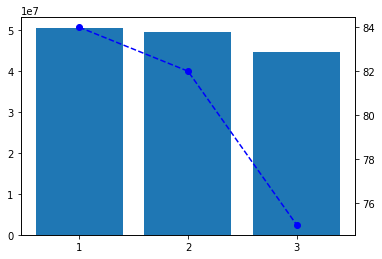

In [81]:
fig,ax = plt.subplots(figsize=(6,4))
df_1 = df_vd[df_vd["COUNTRY"] == "Italy"]
ax.bar(["1","2","3"], [int(df_1["PERSONS_VACCINATED_1PLUS_DOSE"]),int(df_1["PERSONS_FULLY_VACCINATED"]),int(df_1["PERSONS_BOOSTER_ADD_DOSE"])])
ax2 = ax.twinx()
ax2.plot(["1","2","3"], [int(df_1["PERSONS_VACCINATED_1PLUS_DOSE_PER100"]),int(df_1["PERSONS_FULLY_VACCINATED_PER100"]),int(df_1["PERSONS_BOOSTER_ADD_DOSE_PER100"])],"bo--")